In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

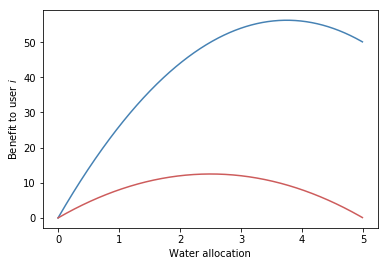

In [2]:
def b1(x):
    return 30*x - 4*x**2
def b2(x):
    return 10*x - 2*x**2
def f(x):
    return -1*(b1(x[0]) + b2(x[1]))

xx = np.arange(0,5,0.01)
plt.plot(xx,b1(xx), color='steelblue')
plt.plot(xx,b2(xx), color='indianred')
plt.ylabel('Benefit to user $i$')
plt.xlabel('Water allocation')
plt.show()

In [3]:
from scipy import optimize
sol = optimize.minimize(f, [3,3]) # (0,3) is the starting location
print(sol['x'])
print(sol['fun'])

[3.74999994 2.49999991]
-68.74999999999997


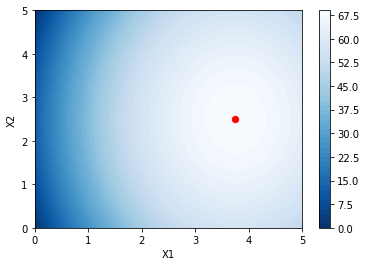

In [4]:
X1,X2 = np.meshgrid(xx, xx)
Z = b1(X1) + b2(X2)

# Contour lines in the background
plt.contourf(X1,X2,Z,50,cmap=plt.cm.Blues_r)
plt.colorbar()

# And the optimal point ...
plt.scatter(sol['x'][0], sol['x'][1], s=40, color='r', zorder=5)
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In the more complicated case that the constraint is a function of one or more decision variables, define the function and use the `constraints` keyword with a dictionary describing your constraint. For example, we'll enforce $x_1 + x_2 = 5$:

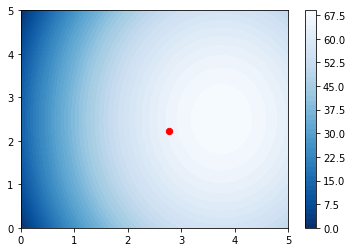

In [5]:
# if returns > zero, constraint satisfied
def f_constraint(x):
    return -(x[0] + x[1] - 5)

def f_2(x):
    return x[1] - 0.8*x[0]

constraint = {'type': 'ineq', 'fun': f_constraint}
constraint2 = {'type': 'ineq', 'fun': f_2}

sol = optimize.minimize(f, [0,5], constraints=[constraint,constraint2])
# print sol['x']
plt.contourf(X1,X2,Z,50,cmap=plt.cm.Blues_r)
plt.colorbar()
plt.plot(X1,(5-X1), color='k')
plt.plot(X1,0.8*X1, color='k')
plt.scatter(sol['x'][0], sol['x'][1], s=40, color='r', zorder=5)
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

#### General Form

$\min_{\mathbf{x}} f(\mathbf{x}) $

$s.t.: h(\mathbf{x}) = 0$

#### Our example

$\min_{\mathbf{x}} f(\mathbf{x}) = (30x_1 - 4x_1^2) + (10x_2 - 2x_2^2)$

$s.t.: x_1 + x_2 = 5 $, or equivalently $x_1 + x_2 - 5 = 0$

#### Minimizing Sum of Costs

$$ \min_{x} f(\mathbf{x}) = (x_1 - 3)^2 + (x_2 - 5)^2 $$
$$ s.t.: x_1 + x_2 = 6$$

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda h(\mathbf{x}) $$

$$L(\mathbf{x}, \lambda) = (x_1 - 3)^2 + (x_2 - 5)^2 - \lambda (x_1 + x_2 - 6)$$

$$\frac{\partial L}{\partial x_1} = 2(x_1 - 3) - \lambda = 0 $$

$$\frac{\partial L}{\partial x_2} = 2(x_2 - 5) - \lambda = 0 $$

$$\frac{\partial L}{\partial \lambda} = x_1 + x_2 - 6 = 0 $$

$$ \implies \lambda^* = -2, x_1^* = 2, x_2^* = 4  $$


$\nabla f(\mathbf{x}) = 0$ (regular condition), 

or $ \nabla f(\mathbf{x}) = c\nabla h(\mathbf{x}) $ (the constraint and the contours of $f$ are parallel). 

The gradients don't have to be equal, only parallel. Thus the coefficient $c$. 

To make things fancy we'll call this coefficient $\lambda$

#### General eqns :

$$\frac{\partial L}{\partial x_1} = 0 $$

$$\frac{\partial L}{\partial x_2} = 0 $$

$$ \dots $$

$$\frac{\partial L}{\partial x_n} = 0 $$

$$\frac{\partial L}{\partial \lambda} = 0 $$


#### Other stuff

We have an equality constraint: $x_1 + x_2 = b$ (units of water)

and $L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda (x_1 + x_2 - b)$

so $\lambda = \frac{\partial L}{\partial b}$ is the unit change in the cost per unit change in the constraint.

---

Slope = $\lambda^* = \frac{10}{3}$




#### Minimizing costs a different way

$$ \min_{x} f(\mathbf{x}) = (x_1 - 3)^2 + (x_2 - 5)^2 $$
$$ s.t.: x_1 + x_2 = 4$$

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda h(\mathbf{x}) $$

$$L(\mathbf{x}, \lambda) = (x_1 - 3)^2 + (x_2 - 5)^2 - \lambda (x_1 + x_2 - 4)$$

$$\frac{\partial L}{\partial x_1} = 2(x_1 - 3) - \lambda = 0 $$

$$\frac{\partial L}{\partial x_2} = 2(x_2 - 5) - \lambda = 0 $$

$$\frac{\partial L}{\partial \lambda} = x_1 + x_2 - 4 = 0 $$

$$ \implies \lambda^* = -4, x_1^* = 1, x_2^* = 3  $$




#### Maximizing Benefits

$$\min_{x} f(\mathbf{x}) = (30x_1 - 4x_1^2) + (10x_2 - 2x_2^2)$$

$$s.t.: x_1 + x_2 - 5 = 0$$

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda h(\mathbf{x}) $$

$$L(\mathbf{x}, \lambda) = (30x_1 - 4x_1^2) + (10x_2 - 2x_2^2) - \lambda (x_1 + x_2 - 5)$$

$$\frac{\partial L}{\partial x_1} = 30 - 8x_1 - \lambda = 0 $$

$$\frac{\partial L}{\partial x_2} = 10 - 4x_2 - \lambda = 0 $$

$$\frac{\partial L}{\partial \lambda} = x_1 + x_2 - 5 = 0 $$

$$ \implies \lambda^* = \frac{10}{3}, x_1^* = \frac{10}{3}, x_2^* = \frac{5}{3}  $$

#### Maximizing Benefits - 2

$$\min_{x} f(\mathbf{x}) = (30x_1 - 4x_1^2) + (10x_2 - 2x_2^2)$$

$$s.t.: x_1 + x_2 - 3 = 0$$

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda h(\mathbf{x}) $$

$$L(\mathbf{x}, \lambda) = (30x_1 - 4x_1^2) + (10x_2 - 2x_2^2) - \lambda (x_1 + x_2 - 3)$$

$$\frac{\partial L}{\partial x_1} = 30 - 8x_1 - \lambda = 0 $$

$$\frac{\partial L}{\partial x_2} = 10 - 4x_2 - \lambda = 0 $$

$$\frac{\partial L}{\partial \lambda} = x_1 + x_2 - 3 = 0 $$

$$ \implies \lambda^* = \frac{26}{3}, x_1^* = \frac{8}{3}, x_2^* = \frac{1}{3}  $$

#### Linear programming example from Lynch p.132

Choose two crops to grow (in tons): cotton and barley, with prices given:

$\max_x  (p_c x_c + p_b x_b)$

Subject to constraints on water, land, and fertilizer.

The requirements of each resource for each crop are known:

$10x_c + 5x_b \leq 20$

$x_c + 1.5x_b \leq 3$

$2x_c + 2x_b \leq 4.5$

And of course we can't have negative decision variables:

$x_c, x_b \geq 0$

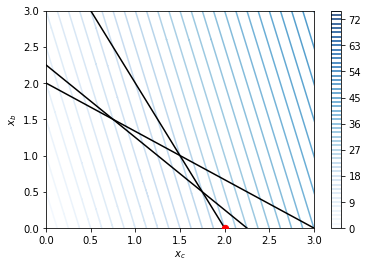

In [6]:
from scipy import optimize

A = np.array([[10,1,2,-1,0], [5,1.5,2,0,-1 ]]).T
b = np.array([ 20, 3, 4.5, 0, 0])
c = np.array([ -12, -3 ])
sol = optimize.linprog(c,A,b)

x = np.arange(0,5.01,0.01)
X1,X2 = np.meshgrid(x,x)
Z = -c[0]*X1 + -c[1]*X2

# Contour lines in the background
plt.contour(X1,X2,Z,50,cmap=plt.cm.Blues)
plt.colorbar()

# Plot constraint lines
plt.plot(x, 4-2*x, color='k')
plt.plot(x, 2-(2/3)*x, color='k')
plt.plot(x, 9/4-x, color='k')

# And the optimal point ...
plt.scatter(sol['x'][0], sol['x'][1], s=40, color='r', zorder=5)
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel('$x_c$')
plt.ylabel('$x_b$')
plt.show()

#### Attempting an interactive widget

In [9]:
def lpplot(pc=5, pb=3, W=20, L=3, F=4.5):
    A = np.array([[10,1,2,-1,0], [5,1.5,2,0,-1 ]]).T
    b = np.array([ W, L, F, 0, 0])
    c = np.array([ -pc, -pb ])
    sol = optimize.linprog(c,A,b)

    x = np.arange(0,5.01,0.01)
    X1,X2 = np.meshgrid(x,x)
    Z = -c[0]*X1 + -c[1]*X2

    # Contour lines in the background
    plt.contour(X1,X2,Z,50,cmap=plt.cm.cool)
    plt.colorbar()

    # Plot constraint lines
    plt.plot(x, (W-10*x)/5, color='k')
    plt.plot(x, (L-x)/1.5, color='k')
    plt.plot(x, (F-2*x)/2, color='k')

    # And the optimal point ...
    plt.scatter(sol['x'][0], sol['x'][1], s=40, color='r', zorder=5)
    plt.xlim([0,3])
    plt.ylim([0,3])
    plt.xlabel('$x_c$')
    plt.ylabel('$x_b$')
    plt.show()



In [10]:
from ipywidgets import interact

interact(lpplot, pc=(0.,12.), pb=(0.,12.), W=(15.,25.), L=(1.,5.), F=(3.,6.))

interactive(children=(FloatSlider(value=5.0, description='pc', max=12.0), FloatSlider(value=3.0, description='…

<function __main__.lpplot(pc=5, pb=3, W=20, L=3, F=4.5)>